# SVM vs K-Medias

<img src="PORTADA.png">

# Importar las librerias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Liberirias para crear la interface.

import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact_manual
from random import randint
from IPython.display import display
from IPython.display import clear_output
import glob
from skimage.color import rgb2gray
import skimage.io as io
%matplotlib inline

# Cargar el Dataset

In [3]:
files = glob.glob ("DataSetCosas/*.png") # Cargamos todas las imagenes.
data,images,target = [],[],[]
i = 0
for myFile in files:
    #cargamos una imagen de color en modo escala de grisis
    img = io.imread(myFile)
    img = rgb2gray(img)
    images.append (img)
    a = img.reshape((22500 ,))
    data.append(a)
    
    if i <= 199:
        target.append(0)
    elif i > 199 and i <= 399:
        target.append(1)
    else:
        target.append(2)
    i+=1

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
X = data
y= target # Variable objetiva (es lo que se desea predecir)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# Entrenar el Support Vector Classifier

In [11]:
from sklearn.svm import SVC

In [12]:
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Predicción y evaluación

In [14]:
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print("--------------")
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.37      1.00      0.54        59
          1       1.00      0.01      0.03        69
          2       0.68      0.25      0.37        52

avg / total       0.70      0.41      0.29       180

--------------
[[59  0  0]
 [62  1  6]
 [39  0 13]]


# Aplicativo

Button(description='Muestra Aleatoria', layout=Layout(width='300px'), style=ButtonStyle())

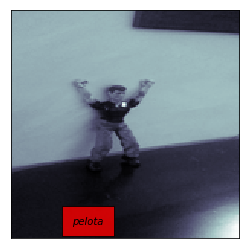

In [48]:
button = widgets.Button(description="Muestra Aleatoria",layout=widgets.Layout(width='300px',button_style='success'))
display(button)

def on_button_clicked(b):
    clear_output(wait=False)
    display(button)
    
    num = randint(0,179)
    
    fig = plt.figure(figsize=(100,100))
    d=fig.add_subplot(20,20,1, xticks=[],yticks=[])
    
    d.imshow(np.array(X_test).reshape(-1,150,150)[num], cmap=plt.cm.bone)
    
    if predictions[num] == 0:
        etiqueta = 'Coca cola'
    elif predictions[num] == 1:
        etiqueta = 'juguete'
    else:
        etiqueta = 'pelota'
        
    if predictions[num] == y_test[num]:
        d.text(40,140, etiqueta, style='italic',bbox={'facecolor':'green','alpha':0.8, 'pad':10})
    else:
        d.text(40,140, etiqueta, style='italic',bbox={'facecolor':'red','alpha':0.8, 'pad':10})
        
button.on_click(on_button_clicked)

# Entrenar K-Medias

In [16]:
#import  kmeans
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Predicción y evaluación

In [53]:
print(classification_report(target,kmeans.labels_))
print("--------------")
print(confusion_matrix(target,kmeans.labels_))

             precision    recall  f1-score   support

          0       0.25      0.35      0.30       200
          1       0.11      0.09      0.10       200
          2       0.48      0.35      0.41       200

avg / total       0.28      0.27      0.27       600

--------------
[[ 71 105  24]
 [128  18  54]
 [ 82  47  71]]


# Aplicativo

Button(description='Muestra Aleatoria', layout=Layout(width='300px'), style=ButtonStyle())

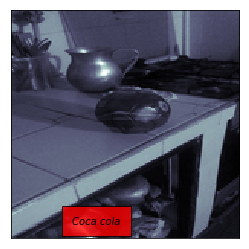

In [52]:
button = widgets.Button(description="Muestra Aleatoria",layout=widgets.Layout(width='300px',button_style='success'))
display(button)

def on_button_clicked(b):
    clear_output(wait=False)
    display(button)
    
    num = randint(0,599)
    
    fig = plt.figure(figsize=(100,100))
    d=fig.add_subplot(20,20,1, xticks=[],yticks=[])
    
    d.imshow(np.array(data).reshape(-1,150,150)[num], cmap=plt.cm.bone)
    
    if kmeans.labels_[num] == 0:
        etiqueta = 'Coca cola'
    elif kmeans.labels_[num] == 1:
        etiqueta = 'juguete'
    else:
        etiqueta = 'pelota'
        
    if kmeans.labels_[num] == target[num]:
        d.text(40,140, etiqueta, style='italic',bbox={'facecolor':'green','alpha':0.8, 'pad':10})
    else:
        d.text(40,140, etiqueta, style='italic',bbox={'facecolor':'red','alpha':0.8, 'pad':10})
        
button.on_click(on_button_clicked)